# Airbnb Market Analysis (EDA)

---
This project analyzes the Airbnb listing market using public listing data.
We focus on:
- Price structure (room type, capacity, location)
- Relationships between price, ratings, and availability
- Supply structure (private vs professional hosts)

**Goal:** produce clear, business-friendly insights from exploratory analysis. 

## Contents
1. Setup & Data Loading  
2. Data Overview  
3. Data Cleaning  
4. Exploratory Data Analysis (EDA)  
5. Business Perspective  
6. Key Insights & Next Steps




### 1. Setup & Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Optional: for nicer plots
import seaborn as sns

pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 200)

In [2]:
from pathlib import Path

FIG_DIR = Path("../outputs/figures")
FIG_DIR.mkdir(parents=True, exist_ok=True)


DATA_PATH = Path("..") / "data" / "raw" / "listings.csv"
df = pd.read_csv(DATA_PATH)

df.shape

(22783, 79)

### 2. Data Overview

In [3]:
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,197677,https://www.airbnb.com/rooms/197677,20250323161203,2025-03-24,city scrape,Oshiage Holiday Apartment,NaN,NaN,https://a0.muscache.com/pictures/38437056/d27f...,964081,https://www.airbnb.com/users/show/964081,Yoshimi & Marek,2011-08-13,"Tokyo, Japan",Would love to travel all over the world and me...,within a day,100%,92%,t,https://a0.muscache.com/im/users/964081/profil...,https://a0.muscache.com/im/users/964081/profil...,Sumida District,1,2,"['email', 'phone']",t,t,NaN,Sumida Ku,NaN,35.71707,139.82608,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,2.0,"[""Smoke alarm"", ""Dryer"", ""TV"", ""Hangers"", ""Hea...","$10,400.00",3,1125,3.0,3.0,1125.0,1125.0,3.0,1125.0,NaN,t,10,23,37,147,2025-03-24,183,8,0,72,9,48,499200.0,2011-09-21,2024-12-12,4.78,4.75,4.91,4.85,4.84,4.56,4.80,M130003350,f,1,1,0,0,1.11
1,905944,https://www.airbnb.com/rooms/905944,20250323161203,2025-03-24,city scrape,4F Spacious Apartment in Shinjuku / Shibuya Tokyo,NEWLY RENOVATED property entirely for you & yo...,Hatagaya is a great neighborhood located 4 min...,https://a0.muscache.com/pictures/hosting/Hosti...,4847803,https://www.airbnb.com/users/show/4847803,Best Stay In Tokyo!,2013-01-25,"Tokyo, Japan",A host backed up by a team of professional cle...,within an hour,100%,100%,t,https://a0.muscache.com/im/users/4847803/profi...,https://a0.muscache.com/im/users/4847803/profi...,Shibuya District,9,18,"['email', 'phone']",t,t,"Shibuya, Tokyo Prefecture, Japan",Shibuya Ku,NaN,35.67878,139.67847,Entire rental unit,Entire home/apt,6,1.5,1.5 baths,2.0,4.0,"[""Portable fans"", ""Ethernet connection"", ""Smok...","$27,735.00",5,1125,1.0,10.0,365.0,1125.0,4.8,1009.6,NaN,t,1,6,23,267,2025-03-24,254,48,4,185,42,255,7072425.0,2013-04-07,2025-03-17,4.81,4.82,4.80,4.88,4.92,4.80,4.80,Hotels and Inns Business Act | 渋谷区保健所長 | 31渋健生...,t,8,8,0,0,1.74
2,1016831,https://www.airbnb.com/rooms/1016831,20250323161203,2025-03-24,city scrape,5 mins Shibuya Cat modern sunny Shimokita,"Hi there, I am Wakana and I live with my two f...",The location is walkable distance to famous Sh...,https://a0.muscache.com/pictures/airflow/Hosti...,5596383,https://www.airbnb.com/users/show/5596383,Wakana,2013-03-24,"Tokyo, Japan","Hi there, I am Wakana! I am an openminded, fri...",within a few hours,100%,96%,t,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,Shimokitazawa,1,6,"['email', 'phone']",t,t,"Setagaya, Tokyo Prefecture, Japan",Setagaya Ku,NaN,35.65800,139.67134,Private room in home,Private room,2,1.0,1 shared bath,1.0,2.0,"[""Portable fans"", ""Et

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22783 entries, 0 to 22782
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            22783 non-null  int64  
 1   listing_url                                   22783 non-null  object 
 2   scrape_id                                     22783 non-null  int64  
 3   last_scraped                                  22783 non-null  object 
 4   source                                        22783 non-null  object 
 5   name                                          22783 non-null  object 
 6   description                                   22422 non-null  object 
 7   neighborhood_overview                         13142 non-null  object 
 8   picture_url                                   22783 non-null  object 
 9   host_id                                       22783 non-null 

In [5]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,22783.0,NaN,NaN,NaN,806504466218509696.0,529103621999664384.0,197677.0,49889587.0,1036686811682207488.0,1236819184967898112.0,1382599511271752960.0
listing_url,22783,22783,https://www.airbnb.com/rooms/197677,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
scrape_id,22783.0,NaN,NaN,NaN,20250323161203.0,8.293151,20250323161203.0,20250323161203.0,20250323161203.0,20250323161203.0,20250323161203.0
last_scraped,22783,3,2025-03-24,20402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source,22783,2,city scrape,20645,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,22783,20265,Shinjuku Double Bed Room/Perfect Access Okubo2min,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,22422,12894,There's no better way to immerse yourself in t...,111,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighborhood_overview,13142,5228,About Shinjuku<br />Shinjuku is one of the big...,106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
picture_url,22783,21287,https://a0.muscache.com/pictures/miso/Hosting-...,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,22783.0,NaN,NaN,NaN,345155292.316596,204399954.760521,322234.0,162970600.0,343260722.0,536783886.0,685331893.0


### 3. Data Cleaning

We clean key columns used in analysis:
- `price`: remove currency symbols, convert to numeric
- remove extreme values (optional, to reduce noise)
- keep only rows with valid ratings if analyzing ratings

In [6]:
cols=[
    'host_id',
    'id',
    'price',
    'room_type',
    'accommodates',
    'bedrooms',
    'beds',
    'bathrooms',
    'minimum_nights',
    'number_of_reviews',
    'review_scores_rating',
    'availability_365',
    'latitude',
    'longitude',
    'neighbourhood_cleansed'
]
clean=df[cols].copy()
# Example: clean price like "$123.00"
if clean['price'].dtype=='object':
   clean['price']=(
             clean['price']
             .str.replace('$','',regex=False)
             .str.replace(',','',regex=False)
)

clean['price'] = pd.to_numeric(clean['price'], errors='coerce')


# Drop missing price
clean=clean.dropna(subset=['price'])
# Optional: remove extreme prices (adjust thresholds)
clean = clean[(clean["price"] > 0) & (clean["price"] <= clean["price"].quantile(0.99))]

clean.shape

(20439, 15)

### 4. Exploratory Data Analysis (EDA)

Saved: True
../outputs/figures/price_distribution.png


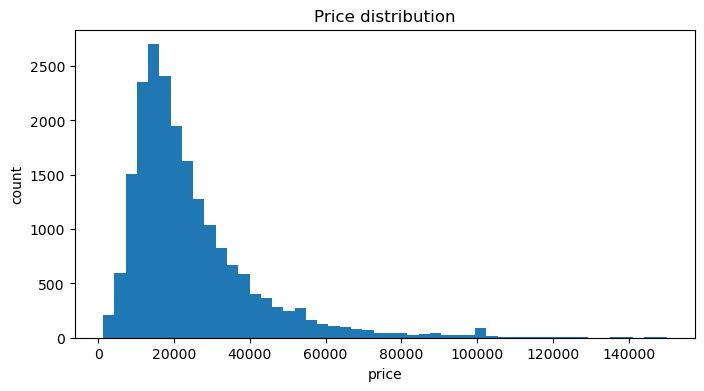

In [7]:
plt.figure(figsize=(8,4))
plt.hist(clean["price"], bins=50)
plt.title("Price distribution")
plt.xlabel("price")
plt.ylabel("count")
plt.savefig(FIG_DIR / "price_distribution.png", dpi=300)

out = FIG_DIR / "price_distribution.png"
print("Saved:", out.exists())
print(out)
plt.show()

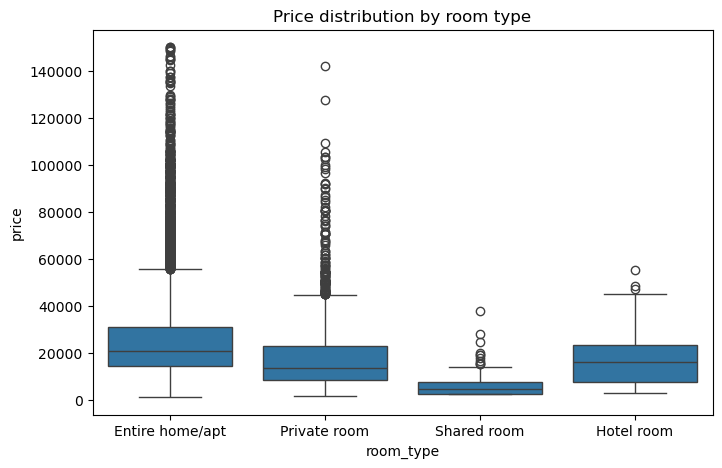

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,17549.0,25802.921135,17351.336235,1252.0,14657.0,20700.0,31160.0,150000.0
Hotel room,91.0,17577.263736,12116.713331,3000.0,7733.0,16286.0,23500.0,55454.0
Private room,2572.0,18113.165241,14523.902341,1600.0,8641.5,13657.0,23143.0,141877.0
Shared room,227.0,6195.220264,4574.669214,2429.0,2807.0,4800.0,7770.5,37714.0


In [8]:
plt.figure(figsize=(8,5))
sns.boxplot(data=clean, x="room_type", y="price")
plt.title("Price distribution by room type")
plt.xlabel("room_type")
plt.ylabel("price")
plt.savefig(FIG_DIR / "Price_distribution_room type.png", dpi=300)
plt.show()

clean.groupby("room_type")["price"].describe()

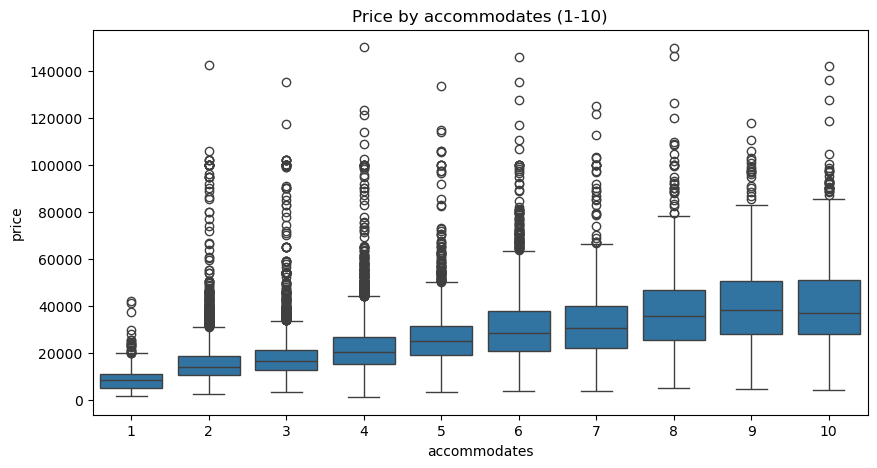

In [9]:
# Optional: limit to reasonable range to make plot readable
tmp = clean[clean["accommodates"].between(1, 10)]

plt.figure(figsize=(10,5))
sns.boxplot(data=tmp, x="accommodates", y="price")
plt.title("Price by accommodates (1-10)")
plt.xlabel("accommodates")
plt.ylabel("price")
plt.savefig(FIG_DIR / "price_accommodates.png", dpi=300)
plt.show()

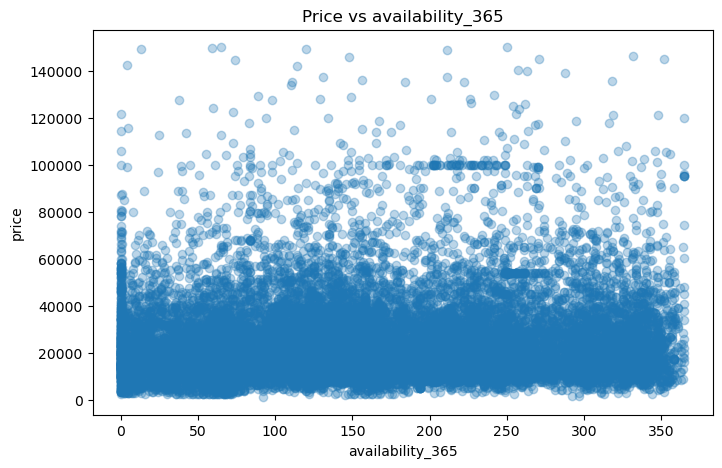

,price,availability_365
price,1.000000,0.047729
availability_365,0.047729,1.000000


In [10]:
plt.figure(figsize=(8,5))
plt.scatter(clean["availability_365"], clean["price"], alpha=0.3)
plt.title("Price vs availability_365")
plt.xlabel("availability_365")
plt.ylabel("price")
plt.savefig(FIG_DIR / "Price_availability_365.png", dpi=300)
plt.show()

clean[["price","availability_365"]].corr()

### 5. Business Perspective

In [11]:
host_count = clean.groupby("host_id")["id"].count().rename("listing_count")
host_df = host_count.reset_index()

# Define professional host threshold (you can try 5, 10...)
THRESHOLD = 5
host_df["host_type"] = np.where(host_df["listing_count"] > THRESHOLD, "professional", "private")

host_df["host_type"].value_counts(normalize=True)

host_type
private         0.815424
professional    0.184576
Name: proportion, dtype: float64

In [12]:
market_share = host_df.groupby("host_type")["listing_count"].sum()
market_share_ratio = market_share / market_share.sum()
market_share_ratio

host_type
private         0.351827
professional    0.648173
Name: listing_count, dtype: float64

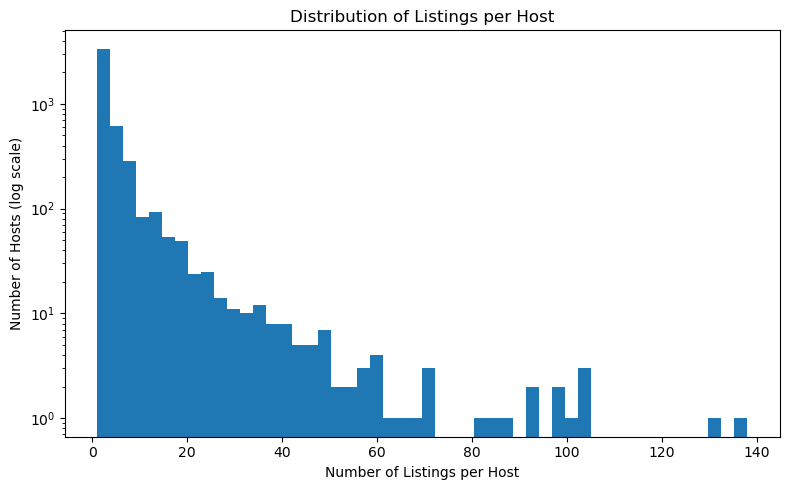

In [13]:
host_count = clean.groupby('host_id').size()
plt.figure(figsize=(8,5))

plt.hist(host_count, bins=50, log=True)

plt.xlabel("Number of Listings per Host")
plt.ylabel("Number of Hosts (log scale)")
plt.title("Distribution of Listings per Host")

plt.tight_layout()
plt.savefig(FIG_DIR /"listings_per_host.png", dpi=300)
plt.show()

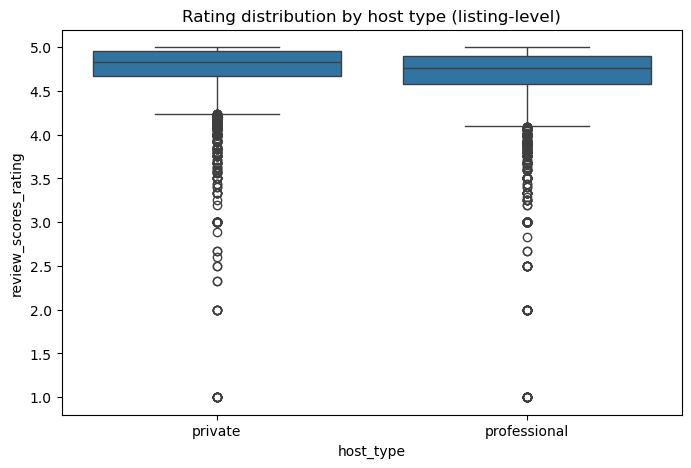

,count,mean,std,min,25%,50%,75%,max
host_type,,,,,,,,
private,6484.0,4.756477,0.325806,1.0,4.67,4.83,4.96,5.0
professional,11330.0,4.692186,0.344339,1.0,4.58,4.76,4.90,5.0


In [14]:
merged =clean.merge(host_df[["host_id","host_type"]], on="host_id", how="left")

rating_df = merged[merged["review_scores_rating"].notna()]

plt.figure(figsize=(8,5))
sns.boxplot(data=rating_df, x="host_type", y="review_scores_rating")
plt.title("Rating distribution by host type (listing-level)")
plt.xlabel("host_type")
plt.ylabel("review_scores_rating")
plt.savefig(FIG_DIR / "Rating distribution by host type.png", dpi=300)

plt.show()

rating_df.groupby("host_type")["review_scores_rating"].describe()

In [15]:
### 6. Key Insights & Next Steps

#### Key Insights 

- **Price structure:** Entire home/apt tends to have higher median prices and wider variability.
- **Capacity effect:** Price generally increases with accommodates, but with large dispersion.
- **Availability vs price:** correlation is weak, suggesting limited linear relationship.
- **Supply structure:** the market is long-tailed; a small share of hosts control a large share of listings.
- **Ratings & host type:** compare results at listing-level and host-level to avoid misleading conclusions.

#### Limitations
- This analysis is descriptive (EDA), not causal.
- Outlier filtering can affect results.
- Ratings may be missing or biased toward active listings.

#### Next Steps
- Add neighborhood/location analysis (only areas with enough listings).
- Build a simple price prediction baseline model (optional).
- Compare multiple cities or time periods.

In [16]:
# Example: save a cleaned dataset for reproducibility
OUT_PATH = Path("..") / "data" / "processed" / "clean_listings.csv"
OUT_PATH.parent.mkdir(parents=True, exist_ok=True)
clean.to_csv(OUT_PATH, index=False)

OUT_PATH

PosixPath('../data/processed/clean_listings.csv')